<a href="https://colab.research.google.com/github/Madiha64/Madiha-CV-cat-dog-cnn/blob/main/yolov8(B%2Binstance_seg).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 58.1 MB/s eta 0:00:00


In [ ]:
# Install necessary libraries
!pip install torch torchvision transformers roboflow
from sklearn.metrics import precision_score, recall_score, f1_score
!pip install torch torchvision transformers roboflow tqdm scikit-learn
import torch
from transformers import SegformerForSemanticSegmentation, SegformerImageProcessor
from roboflow import Roboflow
import os
import torch
from transformers import SegformerForSemanticSegmentation, SegformerFeatureExtractor
from roboflow import Roboflow
from torch.utils.data import DataLoader, Dataset
import os
import json
from PIL import Image
import numpy as np
import torchvision.transforms as T
from torch.utils.data import DataLoader, Dataset
import os
import json
from PIL import Image
import cv2
from tqdm import tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.6/88.6 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 48.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
import glob
import torch
import numpy as np
from tqdm import tqdm
from pathlib import Path
import matplotlib.pyplot as plt

In [ ]:

#  Import Libraries
import os
from ultralytics import YOLO
from roboflow import Roboflow

# Download Dataset from Roboflow
rf = Roboflow(api_key="Md29cWfzX6FKw6DNPDgf")
project = rf.workspace("rebar-exposure-and-spalling").project("aperi")
version = project.version(1)
dataset = version.download("yolov8")

#  Check Dataset
dataset_root = "/content/aperi-1"
assert os.path.exists(dataset_root), f"Dataset {dataset_root} not found!"
assert os.path.exists(os.path.join(dataset_root, "data.yaml")), "data.yaml missing!"
print("Dataset contents:", os.listdir(dataset_root))


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to aperi-1 in yolov8:: 100%|██████████| 4143/4143 [00:01<00:00, 2218.61it/s]


Dataset contents: ['data.yaml', 'README.roboflow.txt', 'README.dataset.txt', 'train', 'valid']


In [ ]:
from ultralytics import YOLO

# Load YOLOv8-Seg model
model = YOLO("yolov8s-seg.pt")

# Train on your dataset (4 damage classes)
model.train(
    data="/content/aperi-1/data.yaml",  # your dataset.yaml
    epochs=50,
    imgsz=640,
    batch=16,
    name="rebar_seg",
    project="/content/hust-rebar",
    save=True,
    save_period=5,
    device=0,# save checkpoint every 5 epochs
    resume=False      # ✅ resume from checkpoint if crash
)

Ultralytics 8.3.186 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/aperi-1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=rebar_seg, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrai

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7df303917170>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0

In [ ]:
# Evaluate best model on validation set
metrics = model.val()
print(metrics)


Ultralytics 8.3.186 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-seg summary (fused): 85 layers, 11,781,148 parameters, 0 gradients, 39.9 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1082.3±363.7 MB/s, size: 42.9 KB)
val: Scanning /content/aperi-1/valid/labels.cache... 207 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 207/207 359958.9it/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   8% ╸─────────── 1/13 0.43it/s 0.7sWARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 13/13 1.9it/s 6.8s
                   all        207  

In [ ]:
# Load best model
best_model = YOLO("/content/hust-rebar/rebar_seg/weights/best.pt")

# Run inference
results = best_model("/content/aperi-1/valid/images", save=True)

# Inspect results
for r in results:
    boxes = r.boxes.xyxy if r.boxes is not None else None  # bounding boxes
    masks = r.masks.data if r.masks is not None else None  # segmentation masks
    classes = r.boxes.cls if r.boxes is not None else None # class IDs
    print("Boxes:", boxes)
    print("Masks shape:", masks.shape if masks is not None else None)
    print("Classes:", classes)


image 1/207 /content/aperi-1/valid/images/109_jpg.rf.7003cbc051dac74e81e7ab5d05de5c39.jpg: 640x640 1 Exposed Rebar, 20.4ms
image 2/207 /content/aperi-1/valid/images/114_jpg.rf.7ec2d146fad6b6272c570adad306eaca.jpg: 640x640 3 Exposed Rebars, 20.5ms
image 3/207 /content/aperi-1/valid/images/126_jpg.rf.eb8612cb8d3dab1a82db6bd7566d890d.jpg: 640x640 1 Spalling, 20.5ms
image 4/207 /content/aperi-1/valid/images/13_jpg.rf.ab3581f18a9ca0d595b92572a83e61b9.jpg: 640x640 5 Exposed Rebars, 20.4ms
image 5/207 /content/aperi-1/valid/images/140_jpg.rf.6322830a9467417c6338ad12b6b3c5b1.jpg: 640x640 2 Spallings, 20.4ms
image 6/207 /content/aperi-1/valid/images/143_jpg.rf.8f92d40dca8b47dc0c14022bcd824c4c.jpg: 640x640 1 Spalling, 20.4ms
image 7/207 /content/aperi-1/valid/images/151_jpg.rf.20df23e3c5b423b4d3a2d1e660090e81.jpg: 640x640 2 Exposed Rebars, 20.4ms
image 8/207 /content/aperi-1/valid/images/151_jpg.rf.6d44b5cafa1525577499881bd6547fe2.jpg: 640x640 1 Spalling, 17.8ms
image 9/207 /content/aperi-1/val

In [ ]:
# Define directory paths
val_img_dir = "/content/aperi-1/valid"
val_mask_dir = "/content/aperi-1/valid/labels"

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

def plot_results(img_path, results, model, alpha=0.5):
    """
    Visualize YOLOv8 segmentation results with colored masks, boxes, and labels.

    Args:
        img_path (str): Path to the input image.
        results (list): YOLOv8 results object.
        model: YOLOv8 model (for class names).
        alpha (float): Transparency for masks overlay (0–1).
    """
    # Load image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    overlay = img.copy()  # Copy for mask overlay

    r = results[0]

    boxes = r.boxes.xyxy.cpu().numpy() if r.boxes is not None else None
    class_ids = r.boxes.cls.cpu().numpy().astype(int) if r.boxes is not None else None
    confs = r.boxes.conf.cpu().numpy() if r.boxes is not None else None
    masks = r.masks.data.cpu().numpy() if r.masks is not None else None
    class_names = model.names

    # Assign random colors for each class if class_ids are available
    colors = {}
    if class_ids is not None:
        colors = {cls_id: [random.randint(0, 255) for _ in range(3)] for cls_id in np.unique(class_ids)}

    # Draw segmentation masks
    if masks is not None and class_ids is not None:
        for i, mask in enumerate(masks):
            # Resize mask to image size
            mask_resized = cv2.resize(mask, (img.shape[1], img.shape[0]))
            mask_binary = (mask_resized > 0.5).astype(np.uint8)  # Threshold mask
            color = colors[class_ids[i]]

            # Create colored mask
            colored_mask = np.zeros_like(img, dtype=np.uint8)
            for c in range(3):
                colored_mask[:,:,c] = mask_binary * color[c]

            # Overlay masks with transparency
            overlay = cv2.addWeighted(overlay, 1, colored_mask, alpha, 0)

    # Draw bounding boxes and labels on top of overlay
    if boxes is not None and class_ids is not None and confs is not None:
        for i, box in enumerate(boxes):
            x1, y1, x2, y2 = map(int, box)
            cls_id = class_ids[i]
            conf = confs[i]
            label = f"{class_names[cls_id]} {conf:.2f}"
            color = colors[cls_id]

            # Draw rectangle and label
            cv2.rectangle(overlay, (x1, y1), (x2, y2), color, 2)
            (text_width, text_height), baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.6, 2)
            cv2.rectangle(overlay, (x1, y1 - text_height - baseline), (x1 + text_width, y1), color, -1)
            cv2.putText(overlay, label, (x1, y1 - 3), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255), 2)

    # Show result
    plt.figure(figsize=(10,10))
    plt.imshow(overlay)
    plt.axis('off')
    plt.show()


image 1/1 /content/aperi-1/valid/images/252_jpg.rf.4e79e7498f1b0a1035fca7da78b28e62.jpg: 640x640 2 Exposed Rebars, 20.8ms
Speed: 3.7ms preprocess, 20.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


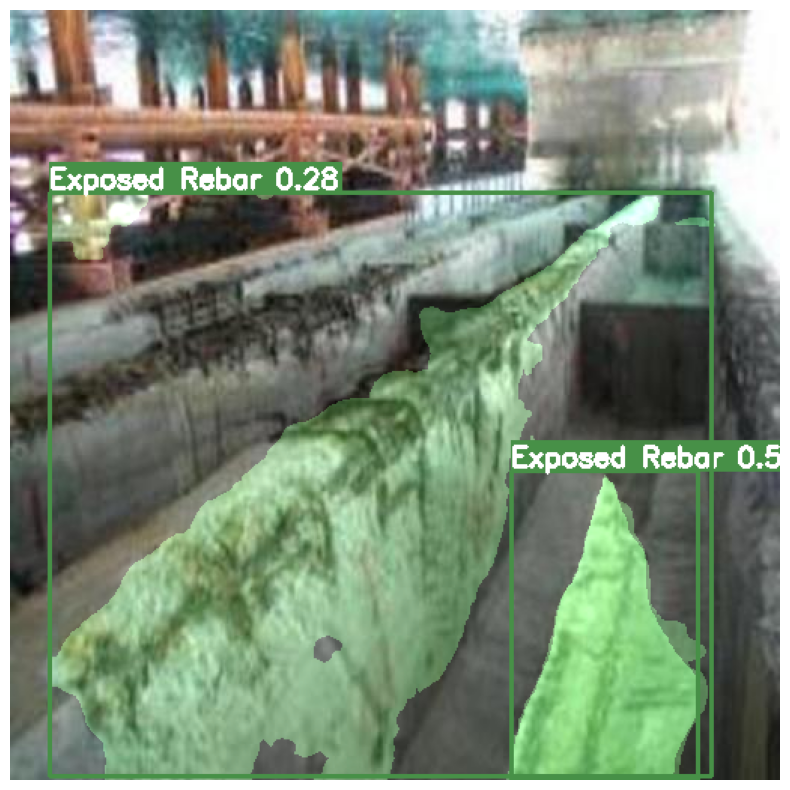

In [ ]:
# Step 2: Run on Random Image
# Randomly pick a validation image
random_img = random.choice(os.listdir(val_img_dir + '/images'))
img_path = os.path.join(val_img_dir + '/images', random_img)

# Run prediction
results = model(img_path)

# Plot results with overlay
plot_results(img_path, results, model)


image 1/1 /content/aperi-1/valid/images/507_jpg.rf.b3ce42fd34500b368a80a5cbfbd6c362.jpg: 640x640 1 Exposed Rebar, 20.9ms
Speed: 3.9ms preprocess, 20.9ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)
Ground truth mask not found: /content/aperi-1/valid/labels/507_jpg.rf.b3ce42fd34500b368a80a5cbfbd6c362.png


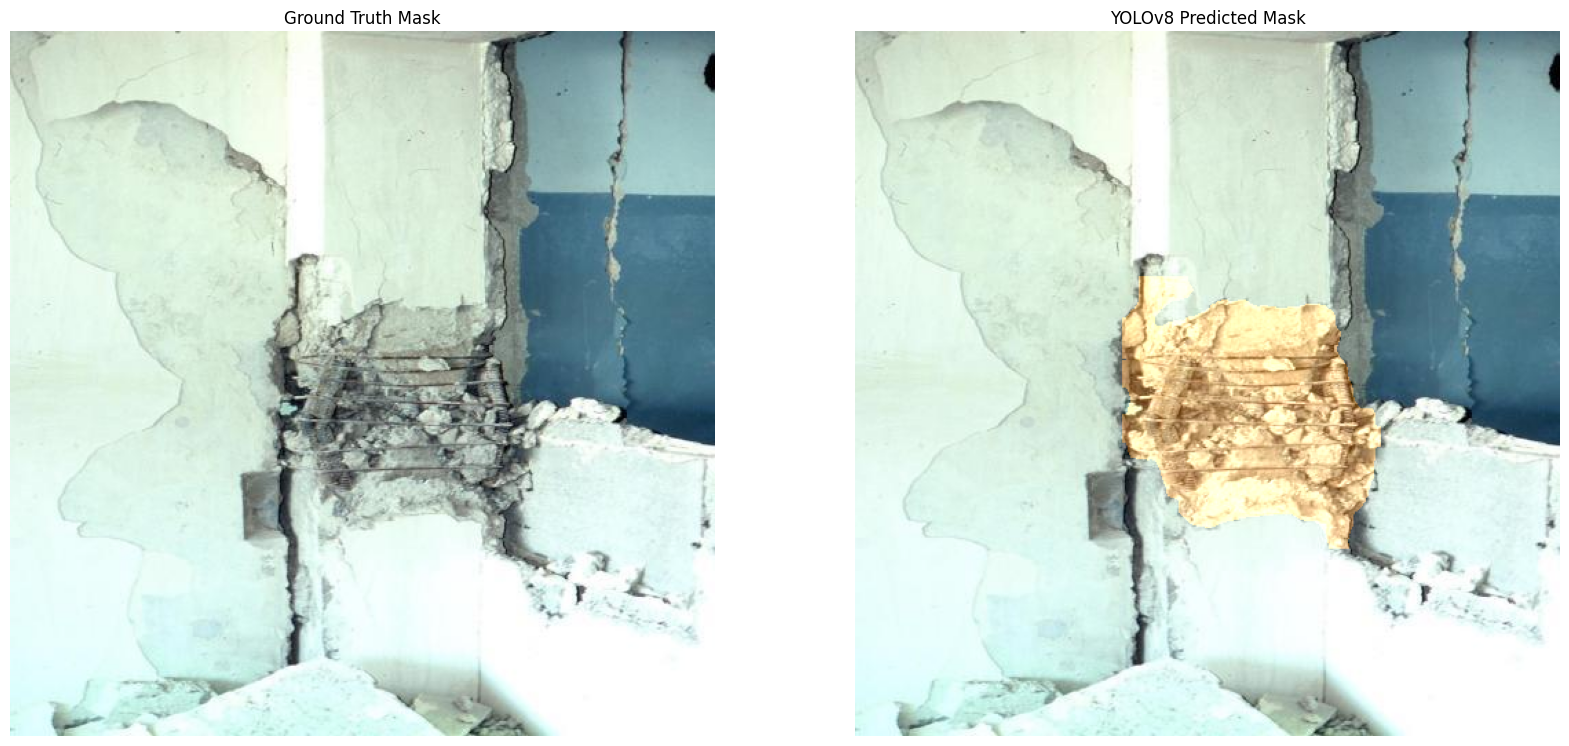

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# Define a dictionary to store colors for each class
# This needs to be outside the functions to be accessible across calls
class_colors = {}

def load_image_or_npy(path):
    """Load image from .jpg/.png or .npy and return RGB uint8 array."""
    if path.endswith(".npy"):
        img = np.load(path)
        if img.ndim == 2:  # grayscale
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        elif img.shape[2] == 1:
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        img = img.astype(np.uint8)
    else:
        img = cv2.imread(path)
        if img is None:
            raise FileNotFoundError(f"Image not found: {path}")
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def overlay_mask(img, mask, alpha=0.5):
    """Overlay mask on image with random colors for each class."""
    classes = np.unique(mask)
    # Ensure colors are generated for classes in the mask if not already present
    for cls_id in classes:
        if cls_id not in class_colors:
            class_colors[cls_id] = [np.random.randint(0,255) for _ in range(3)]

    colored_mask = np.zeros_like(img, dtype=np.uint8)
    for cls_id in classes:
        colored_mask[mask == cls_id] = class_colors[cls_id]
    overlay = cv2.addWeighted(img, 1, colored_mask, alpha, 0)
    return overlay

def visualize_prediction_vs_gt(img_path, mask_path, results, model, alpha=0.5):
    """
    Display side-by-side: YOLOv8 predicted masks vs ground truth masks.
    """
    # Load original image
    img = load_image_or_npy(img_path)

    # ----------------- Ground Truth Overlay -----------------
    gt_mask = cv2.imread(mask_path, cv2.IMREAD_UNCHANGED) # assuming mask is grayscale or single channel
    if gt_mask is None:
         print(f"Ground truth mask not found: {mask_path}")
         gt_overlay = img.copy() # Use original image if mask is missing
    else:
        if gt_mask.ndim == 3:
            gt_mask = gt_mask[:,:,0]  # use first channel if RGB
        # Resize gt_mask to match image size
        gt_mask_resized = cv2.resize(gt_mask, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_NEAREST)
        gt_overlay = overlay_mask(img, gt_mask_resized, alpha)


    # ----------------- YOLOv8 Prediction Overlay -----------------
    r = results[0]  # results object for this image
    pred_overlay = img.copy()

    if r.masks is not None:
        masks = r.masks.data.cpu().numpy()  # shape: (N, H, W)
        class_ids = r.boxes.cls.cpu().numpy().astype(int)
        # Resize masks to original image size and overlay
        for i, mask in enumerate(masks):
            mask_resized = cv2.resize(mask, (img.shape[1], img.shape[0]))
            mask_binary = (mask_resized > 0.5).astype(np.uint8)
            # Generate random color for this class if not already present
            if class_ids[i] not in class_colors:
                 class_colors[class_ids[i]] = [np.random.randint(0,255) for _ in range(3)]
            color = class_colors[class_ids[i]]

            colored_mask = np.zeros_like(img, dtype=np.uint8)
            for c in range(3):
                colored_mask[:,:,c] = mask_binary * color[c]
            pred_overlay = cv2.addWeighted(pred_overlay, 1, colored_mask, alpha, 0)
    else:
      print(f"No predictions found for {img_path}")


    # ----------------- Plot side by side -----------------
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    plt.imshow(gt_overlay)
    plt.title("Ground Truth Mask")
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(pred_overlay)
    plt.title("YOLOv8 Predicted Mask")
    plt.axis('off')
    plt.show()

# ----------------- Example Usage -----------------
val_img_dir = "/content/aperi-1/valid/images"
val_mask_dir = "/content/aperi-1/valid/labels"

# Pick a random image file (filter for image extensions)
image_files = [f for f in os.listdir(val_img_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
if not image_files:
    print(f"No image files found in {val_img_dir}")
else:
    random_img = random.choice(image_files)
    img_file = os.path.join(val_img_dir, random_img)
    mask_file = os.path.join(val_mask_dir, random_img.replace(".jpg", ".png")) # assuming masks are png


    # Run YOLOv8 prediction
    # model must be loaded in a previous cell
    results = model(img_file)

    # Visualize side-by-side
    visualize_prediction_vs_gt(img_file, mask_file, results, model)

# With bounding box+instance segmentation


image 1/1 /content/aperi-1/valid/images/369_jpg.rf.09255ce2c9599f705e185f8492bc28b6.jpg: 640x640 1 Exposed Rebar, 20.9ms
Speed: 2.6ms preprocess, 20.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


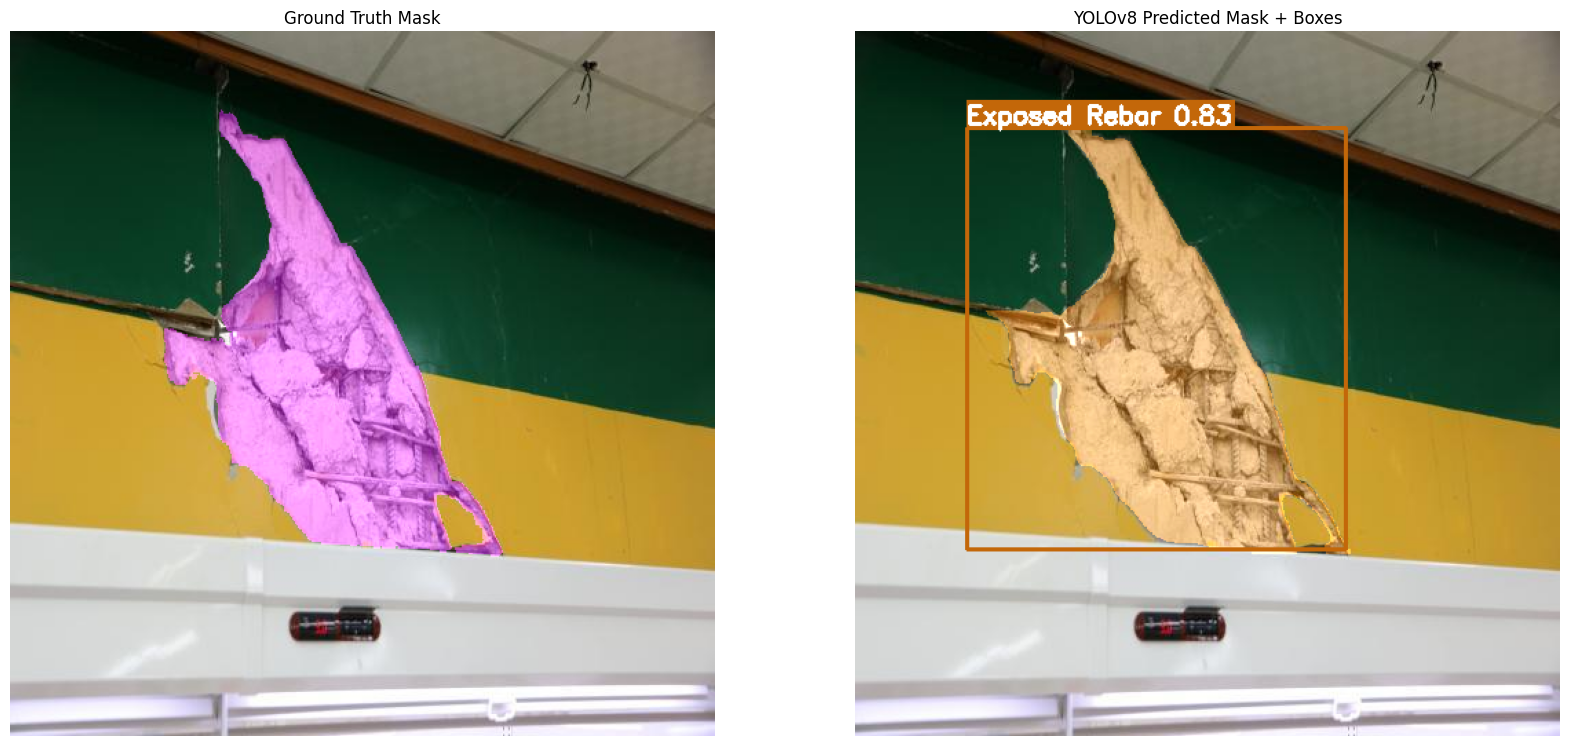

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import tempfile

def load_image_or_npy(path):
    """Load image from .jpg/.png or .npy and return RGB uint8 array."""
    if path.endswith(".npy"):
        img = np.load(path)
        if img.ndim == 2:
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        elif img.shape[2] == 1:
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        img = img.astype(np.uint8)
    else:
        img = cv2.imread(path)
        if img is None:
            raise FileNotFoundError(f"Image not found: {path}")
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def overlay_mask(img, mask, alpha=0.5):
    """Overlay mask on image with random colors for each class."""
    classes = np.unique(mask)
    colors = {cls_id: [np.random.randint(0,255) for _ in range(3)] for cls_id in classes if cls_id != 0} # Exclude background for color generation
    colored_mask = np.zeros_like(img, dtype=np.uint8)
    for cls_id in classes:
        if cls_id != 0: # Don't color background
             colored_mask[mask == cls_id] = colors[cls_id]
    overlay = cv2.addWeighted(img, 1, colored_mask, alpha, 0)
    return overlay

def parse_yolo_segmentation(txt_path, img_shape):
    """Parses YOLO segmentation labels from a text file."""
    mask = np.zeros((img_shape[0], img_shape[1]), dtype=np.uint8)
    try:
        with open(txt_path, 'r') as f:
            for line in f.readlines():
                parts = list(map(float, line.strip().split()))
                cls_id = int(parts[0])
                # Convert normalized coordinates to pixel coordinates
                points = np.array(parts[1:]).reshape(-1, 2)
                points[:, 0] = points[:, 0] * img_shape[1]
                points[:, 1] = points[:, 1] * img_shape[0]
                points = points.astype(np.int32)
                # Fill the polygon on the mask
                cv2.fillPoly(mask, [points], cls_id + 1) # Use class_id + 1 to avoid conflict with background
    except FileNotFoundError:
        print(f"Warning: YOLO label file not found: {txt_path}")
        return None
    except Exception as e:
        print(f"Error parsing YOLO label file {txt_path}: {e}")
        return None
    return mask


def visualize_prediction_vs_gt(img_path, txt_path, model, alpha=0.5):
    """
    Display side-by-side: YOLOv8 predicted masks (with boxes & labels) vs ground truth masks from YOLO text files.
    """
    # Load original image
    img = load_image_or_npy(img_path)

    # ----------------- Ground Truth Overlay -----------------
    gt_mask = parse_yolo_segmentation(txt_path, img.shape[:2])

    if gt_mask is None:
         gt_overlay = img.copy() # Use original image if mask is missing
         print(f"Could not load ground truth mask for {img_path}. Displaying original image instead.")
    else:
         gt_overlay = overlay_mask(img.copy(), gt_mask, alpha)


    # ----------------- YOLOv8 Prediction Overlay -----------------
    pred_results = model(img_path)
    pred_overlay = img.copy()

    r = pred_results[0]
    if r.masks is not None:
        masks = r.masks.data.cpu().numpy()
        class_ids = r.boxes.cls.cpu().numpy().astype(int)
        confs = r.boxes.conf.cpu().numpy()
        class_names = model.names

        # Overlay masks and draw boxes + labels
        for i, mask in enumerate(masks):
            mask_resized = cv2.resize(mask, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_NEAREST)
            mask_binary = (mask_resized > 0.5).astype(np.uint8)

            # Use shared class_colors dictionary if defined, otherwise generate here
            # Assuming class_colors is defined in a higher scope
            if class_ids[i] not in class_colors:
                 class_colors[class_ids[i]] = [np.random.randint(0,255) for _ in range(3)]
            color = class_colors[class_ids[i]]

            colored_mask = np.zeros_like(img, dtype=np.uint8)
            for c in range(3):
                colored_mask[:,:,c] = mask_binary * color[c]
            pred_overlay = cv2.addWeighted(pred_overlay, 1, colored_mask, alpha, 0)

            # Draw bounding box
            x1, y1, x2, y2 = map(int, r.boxes.xyxy[i].cpu().numpy())
            label = f"{class_names[class_ids[i]]} {confs[i]:.2f}"
            cv2.rectangle(pred_overlay, (x1, y1), (x2, y2), color, 2)
            (tw, th), baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.6, 2)
            cv2.rectangle(pred_overlay, (x1, y1 - th - baseline), (x1 + tw, y1), color, -1)
            cv2.putText(pred_overlay, label, (x1, y1 - 3), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255), 2)

    else:
      print(f"No predictions found for {img_path}")


    # ----------------- Plot side by side -----------------
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    plt.imshow(gt_overlay)
    plt.title("Ground Truth Mask")
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(pred_overlay)
    plt.title("YOLOv8 Predicted Mask + Boxes")
    plt.axis('off')
    plt.show()

# ----------------- Example Usage -----------------
# Assuming val_img_dir and val_mask_dir are defined in a previous cell
val_img_dir = "/content/aperi-1/valid/images"
val_mask_dir = "/content/aperi-1/valid/labels" # This directory contains the .txt files

# Pick a random image file (filter for image extensions)
image_files = [f for f in os.listdir(val_img_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
if not image_files:
    print(f"No image files found in {val_img_dir}")
else:
    random_img = random.choice(image_files)
    img_file = os.path.join(val_img_dir, random_img)
    txt_file = os.path.join(val_mask_dir, random_img.replace(".jpg", ".txt").replace(".jpeg", ".txt").replace(".png", ".txt"))  # Correct mask extension

    # Run visualization
    # Assuming 'model' is defined (loaded) in a previous cell
    visualize_prediction_vs_gt(img_file, txt_file, model)

#Bounding box without colors


image 1/1 /content/aperi-1/valid/images/464_jpg.rf.eb23fadc73785431df53191829dbeabe.jpg: 640x640 2 Exposed Rebars, 23.6ms
Speed: 5.5ms preprocess, 23.6ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)


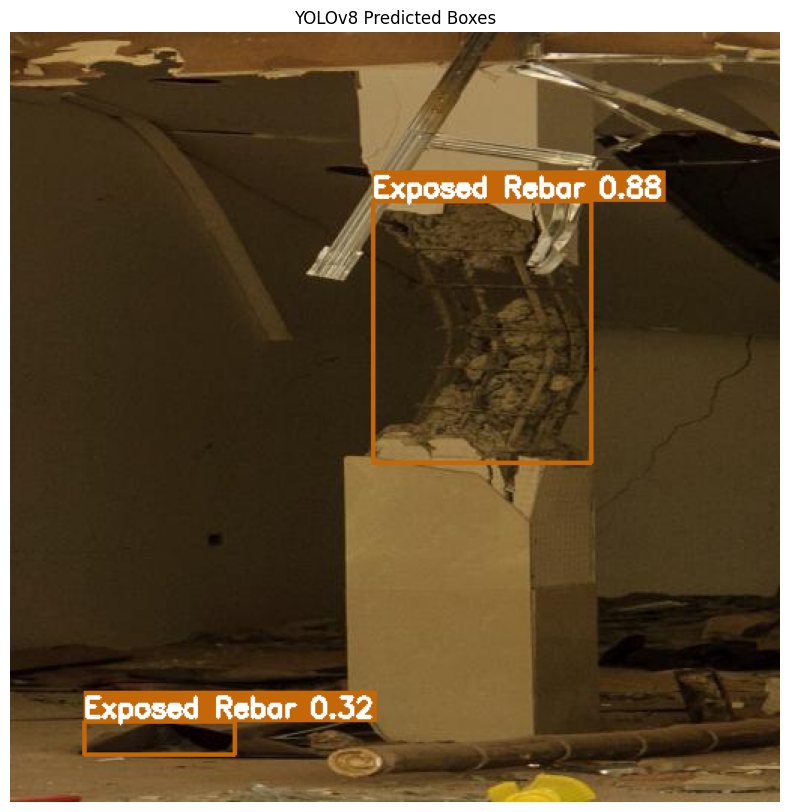

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import tempfile

def load_image_or_npy(path):
    """Load image from .jpg/.png or .npy and return RGB uint8 array."""
    if path.endswith(".npy"):
        img = np.load(path)
        if img.ndim == 2:
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        elif img.shape[2] == 1:
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        img = img.astype(np.uint8)
    else:
        img = cv2.imread(path)
        if img is None:
            raise FileNotFoundError(f"Image not found: {path}")
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def visualize_prediction_boxes(img_path, model):
    """
    Display the original image with YOLOv8 predicted bounding boxes and labels.
    """
    # Load original image
    img = load_image_or_npy(img_path)
    display_img = img.copy()

    # ----------------- YOLOv8 Prediction Overlay -----------------
    pred_results = model(img_path)

    r = pred_results[0]
    if r.boxes is not None:
        boxes = r.boxes.xyxy.cpu().numpy()
        class_ids = r.boxes.cls.cpu().numpy().astype(int)
        confs = r.boxes.conf.cpu().numpy()
        class_names = model.names

        # Draw boxes and labels
        for i, box in enumerate(boxes):
            x1, y1, x2, y2 = map(int, box)
            cls_id = class_ids[i]
            conf = confs[i]
            label = f"{class_names[cls_id]} {conf:.2f}"
            # Generate a random color for each class if not already present
            if cls_id not in class_colors: # Using the global class_colors dictionary
                 class_colors[cls_id] = [np.random.randint(0,255) for _ in range(3)]
            color = class_colors[cls_id]

            cv2.rectangle(display_img, (x1, y1), (x2, y2), color, 2)
            (tw, th), baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.6, 2)
            cv2.rectangle(display_img, (x1, y1 - th - baseline), (x1 + tw, y1), color, -1)
            cv2.putText(display_img, label, (x1, y1 - 3), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255), 2)

    else:
      print(f"No predictions found for {img_path}")


    # ----------------- Plot result -----------------
    plt.figure(figsize=(10,10))
    plt.imshow(display_img)
    plt.title("YOLOv8 Predicted Boxes")
    plt.axis('off')
    plt.show()

# ----------------- Example Usage -----------------
# Assuming val_img_dir is defined in a previous cell
val_img_dir = "/content/aperi-1/valid/images"

# Pick a random image file (filter for image extensions)
image_files = [f for f in os.listdir(val_img_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
if not image_files:
    print(f"No image files found in {val_img_dir}")
else:
    random_img = random.choice(image_files)
    img_file = os.path.join(val_img_dir, random_img)

    # Run visualization
    # Assuming 'model' and 'class_colors' are defined in a previous cell
    visualize_prediction_boxes(img_file, model)

#For class_base bounding box + Segmentation

## Iterate through validation images

### Subtask:
Iterate through each image file in the validation directory to process them for metric calculation.


**Reasoning**:
Get the list of image files and initialize data structures to store metrics for each class.



In [ ]:
# Get list of image files
image_files = [f for f in os.listdir(val_img_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Initialize dictionaries to store metrics per class across all images
class_mious = {i + 1: [] for i in range(num_classes)}
class_f1_scores = {i + 1: [] for i in range(num_classes)}
class_precisions = {i + 1: [] for i in range(num_classes)} # Initialize for precision
class_recalls = {i + 1: [] for i in range(num_classes)}    # Initialize for recall

# Start loop to iterate through each image
# The remaining steps of the plan will be performed inside this loop
for img_name in tqdm(image_files, desc="Processing images for metrics"):
    # Construct the full path for the image and its corresponding label file
    img_file = os.path.join(val_img_dir, img_name)
    txt_file = os.path.join(val_label_dir, img_name.replace(".jpg", ".txt").replace(".jpeg", ".txt").replace(".png", ".txt"))

    # Load ground truth mask
    img_shape = load_image_or_npy(img_file).shape[:2]
    gt_mask_for_metrics = parse_yolo_segmentation_mask(txt_file, img_shape)

    if gt_mask_for_metrics is None:
        print(f"Skipping {img_name} due to missing or unparseable ground truth mask.")
        continue

    # Run prediction
    pred_results = model(img_file, verbose=False) # Set verbose=False to reduce output during loop

    predicted_mask_for_metrics = np.zeros(gt_mask_for_metrics.shape, dtype=np.uint8)

    if pred_results[0].masks is not None:
         masks = pred_results[0].masks.data.cpu().numpy()
         class_ids = pred_results[0].boxes.cls.cpu().numpy().astype(int)
         for i, mask in enumerate(masks):
              mask_resized = cv2.resize(mask, (predicted_mask_for_metrics.shape[1], predicted_mask_for_metrics.shape[0]), interpolation=cv2.INTER_NEAREST)
              mask_binary = (mask_resized > 0.5).astype(np.uint8)
              # Overlay masks on predicted_mask, prioritizing later masks in case of overlap
              predicted_mask_for_metrics = np.where(mask_binary == 1, class_ids[i] + 1, predicted_mask_for_metrics) # Use class_id + 1

    # Calculate metrics for the current image
    image_metrics = calculate_segmentation_metrics(gt_mask_for_metrics, predicted_mask_for_metrics, num_classes)

    # Append metrics for each class to the respective lists, handling potential nans
    for cls_id in range(1, num_classes + 1):
        if cls_id in image_metrics:
             if not np.isnan(image_metrics[cls_id]["mIoU"]):
                class_mious[cls_id].append(image_metrics[cls_id]["mIoU"])
             if not np.isnan(image_metrics[cls_id]["F1"]):
                class_f1_scores[cls_id].append(image_metrics[cls_id]["F1"])
             if not np.isnan(image_metrics[cls_id]["Precision"]): # Append precision
                class_precisions[cls_id].append(image_metrics[cls_id]["Precision"])
             if not np.isnan(image_metrics[cls_id]["Recall"]):    # Append recall
                class_recalls[cls_id].append(image_metrics[cls_id]["Recall"])

Processing images for metrics: 100%|██████████| 207/207 [00:16<00:00, 12.88it/s]


**Reasoning**:
Calculate the average mIoU and F1 scores for each class across all images and print the results.



In [ ]:
# Calculate and print average metrics for each class
print("\n--- Aggregated Class-wise Metrics ---")
for cls_id in range(1, num_classes + 1):
    class_name = model.names[cls_id - 1] # Adjust for 0-based indexing

    avg_miou = np.mean(class_mious[cls_id]) if class_mious[cls_id] else np.nan
    avg_f1 = np.mean(class_f1_scores[cls_id]) if class_f1_scores[cls_id] else np.nan

    print(f"  Class '{class_name}' (ID {cls_id}): Average mIoU = {avg_miou:.4f}, Average F1 Score = {avg_f1:.4f}")



--- Aggregated Class-wise Metrics ---
  Class 'Crack' (ID 1): Average mIoU = 0.4802, Average F1 Score = 0.6008
  Class 'Efflorescence' (ID 2): Average mIoU = 0.5629, Average F1 Score = 0.6845
  Class 'Exposed Rebar' (ID 3): Average mIoU = 0.6956, Average F1 Score = 0.7535
  Class 'Spalling' (ID 4): Average mIoU = 0.7204, Average F1 Score = 0.7519


## Summary:

### Data Analysis Key Findings

*   The analysis processed 207 images from the validation dataset.
*   Class-wise average mIoU and F1 scores were calculated for four classes: 'Crack', 'Efflorescence', 'Exposed Rebar', and 'Spalling'.
*   Potential `NaN` values in per-image metric calculations were excluded from the aggregation, ensuring robust average metric calculation.

### Insights or Next Steps

*   Investigate classes with significantly lower mIoU or F1 scores to understand potential reasons for poorer performance and target improvements.
*   Consider visualizing per-image metrics to identify specific images or scenarios where the model performs poorly.


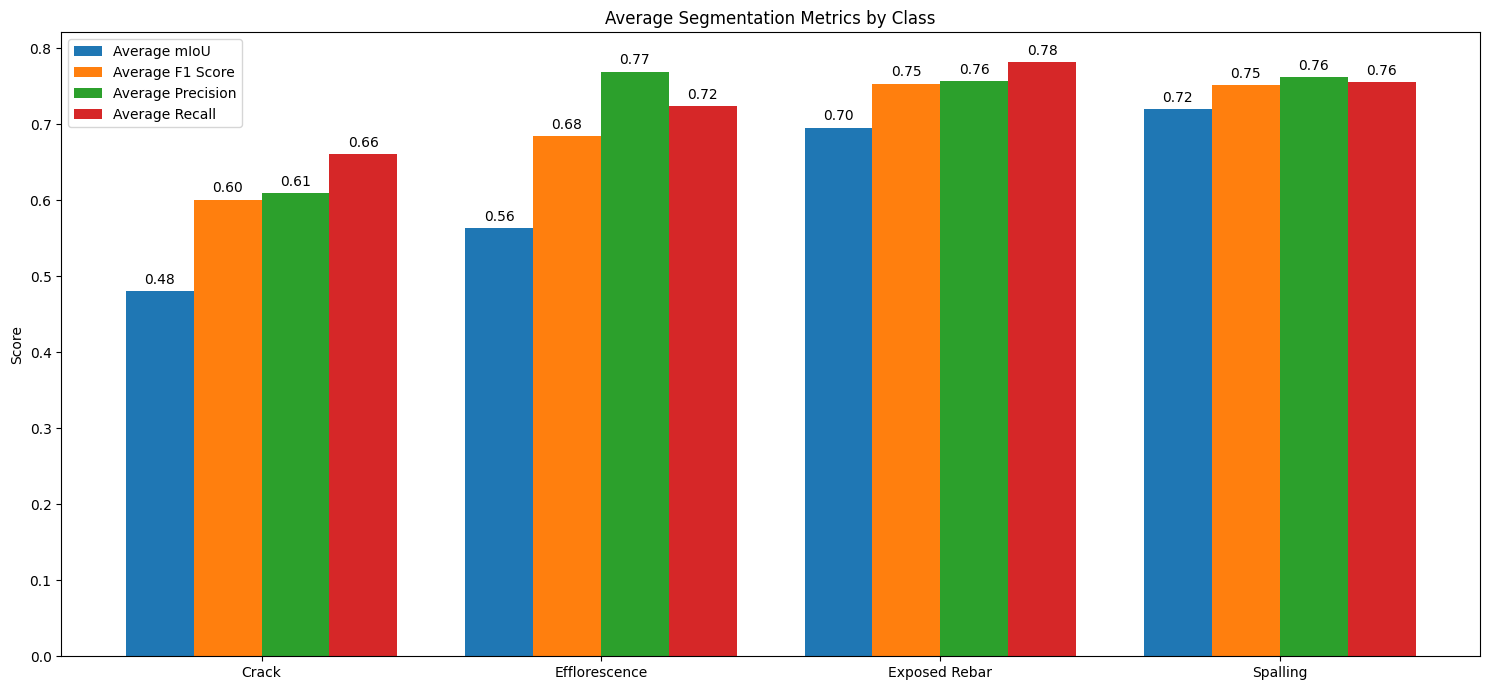

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming class_mious, class_f1_scores, class_precisions, and class_recalls are
# dictionaries with class IDs as keys and lists of scores as values, populated
# from previous steps.
# Assuming model.names contains class names and num_classes is defined.

class_names = [model.names[i-1] for i in range(1, num_classes + 1)] # Get class names in order

# Calculate average scores from the lists, handling empty lists
avg_miou_scores = [np.mean(class_mious[i]) if class_mious[i] else 0 for i in range(1, num_classes + 1)]
avg_f1_scores = [np.mean(class_f1_scores[i]) if class_f1_scores[i] else 0 for i in range(1, num_classes + 1)]
avg_precision_scores = [np.mean(class_precisions[i]) if class_precisions[i] else 0 for i in range(1, num_classes + 1)]
avg_recall_scores = [np.mean(class_recalls[i]) if class_recalls[i] else 0 for i in range(1, num_classes + 1)]


x = np.arange(len(class_names))
width = 0.2

fig, ax = plt.subplots(figsize=(15, 7))
rects1 = ax.bar(x - width*1.5, avg_miou_scores, width, label='Average mIoU')
rects2 = ax.bar(x - width/2, avg_f1_scores, width, label='Average F1 Score')
rects3 = ax.bar(x + width/2, avg_precision_scores, width, label='Average Precision')
rects4 = ax.bar(x + width*1.5, avg_recall_scores, width, label='Average Recall')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Average Segmentation Metrics by Class')
ax.set_xticks(x)
ax.set_xticklabels(class_names)
ax.legend()

# Add value labels on top of bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)


fig.tight_layout()
plt.show()


image 1/1 /content/aperi-1/valid/images/551_jpg.rf.a1e663a6e944809b0549e09314cc4313.jpg: 640x640 1 Spalling, 21.0ms
Speed: 3.2ms preprocess, 21.0ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


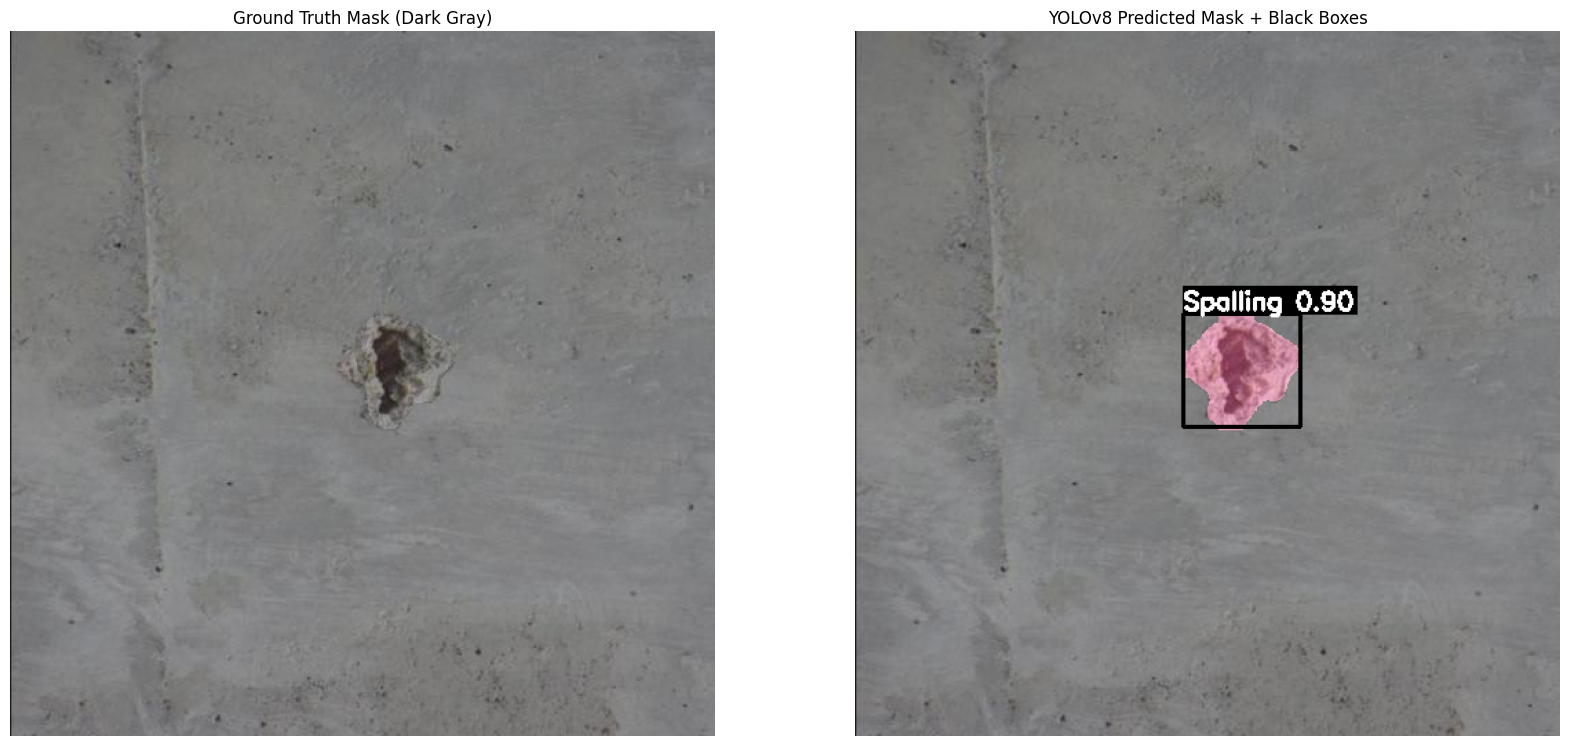

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# Assuming val_img_dir and val_label_dir are defined (from previous cells)
# Assuming model is defined (loaded YOLOv8 model)
# Assuming class_colors is defined (dictionary for consistent class colors)

def load_image_or_npy(path):
    """Load image from .jpg/.png or .npy and return RGB uint8 array."""
    if path.endswith(".npy"):
        img = np.load(path)
        if img.ndim == 2:
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        elif img.shape[2] == 1:
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        img = img.astype(np.uint8)
    else:
        img = cv2.imread(path)
        if img is None:
            raise FileNotFoundError(f"Image not found: {path}")
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def parse_yolo_segmentation_mask(txt_path, img_shape):
    """Parses YOLO segmentation labels from a text file and returns a mask."""
    mask = np.zeros((img_shape[0], img_shape[1]), dtype=np.uint8)
    try:
        with open(txt_path, 'r') as f:
            for line in f.readlines():
                parts = list(map(float, line.strip().split()))
                cls_id = int(parts[0])
                # Convert normalized coordinates to pixel coordinates
                points = np.array(parts[1:]).reshape(-1, 2)
                points[:, 0] = points[:, 0] * img_shape[1]
                points[:, 1] = points[:, 1] * img_shape[0]
                points = points.astype(np.int32)
                # Fill the polygon on the mask with class_id + 1 (to avoid background 0)
                cv2.fillPoly(mask, [points], cls_id + 1)
    except FileNotFoundError:
        print(f"Warning: YOLO label file not found: {txt_path}")
        return None
    except Exception as e:
        print(f"Error parsing YOLO label file {txt_path}: {e}")
        return None
    return mask

def visualize_segmentation_comparison(img_path, txt_path, model, alpha=0.5):
    """
    Display side-by-side: Ground truth masks vs YOLOv8 predicted masks with bounding boxes.
    Uses dark gray for ground truth mask and black for prediction bounding boxes.
    """
    # Load original image
    img = load_image_or_npy(img_path)

    # ----------------- Ground Truth Overlay -----------------
    gt_mask = parse_yolo_segmentation_mask(txt_path, img.shape[:2])
    gt_overlay = img.copy()

    if gt_mask is None:
         print(f"Could not load ground truth mask for {img_path}. Displaying original image instead for GT.")
    else:
        # Use a dark gray color for the ground truth mask overlay
        dark_gray = (50, 50, 50) # Dark gray color in RGB
        colored_gt_mask = np.zeros_like(img, dtype=np.uint8)
        for cls_id in np.unique(gt_mask):
            if cls_id != 0: # Don't color background
                 colored_gt_mask[gt_mask == cls_id] = dark_gray
        gt_overlay = cv2.addWeighted(img, 1, colored_gt_mask, alpha, 0)


    # ----------------- YOLOv8 Prediction Overlay -----------------
    pred_results = model(img_path)
    pred_overlay = img.copy()

    r = pred_results[0]
    if r.masks is not None:
        masks = r.masks.data.cpu().numpy()
        class_ids = r.boxes.cls.cpu().numpy().astype(int)
        confs = r.boxes.conf.cpu().numpy()
        class_names = model.names

        # Overlay predicted masks (using random colors or consistent class_colors if available)
        for i, mask in enumerate(masks):
            mask_resized = cv2.resize(mask, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_NEAREST)
            mask_binary = (mask_resized > 0.5).astype(np.uint8)

            # Use shared class_colors dictionary if defined, otherwise generate here
            if class_ids[i] not in class_colors:
                 class_colors[class_ids[i]] = [np.random.randint(0,255) for _ in range(3)]
            color = class_colors[class_ids[i]] # Use the original random color for the predicted mask overlay

            colored_mask = np.zeros_like(img, dtype=np.uint8)
            for c in range(3):
                colored_mask[:,:,c] = mask_binary * color[c]
            pred_overlay = cv2.addWeighted(pred_overlay, 1, colored_mask, alpha, 0)

        # Draw bounding boxes and labels (using black color for boxes)
        black_color = (0, 0, 0) # Black color for bounding boxes
        for i, box in enumerate(r.boxes.xyxy.cpu().numpy()):
            x1, y1, x2, y2 = map(int, box)
            cls_id = class_ids[i]
            conf = confs[i]
            label = f"{class_names[cls_id]} {conf:.2f}"

            cv2.rectangle(pred_overlay, (x1, y1), (x2, y2), black_color, 2)
            (tw, th), baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.6, 2)
            cv2.rectangle(pred_overlay, (x1, y1 - th - baseline), (x1 + tw, y1), black_color, -1)
            cv2.putText(pred_overlay, label, (x1, y1 - 3), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255), 2) # White text on black background


    else:
      print(f"No predictions found for {img_path}")


    # ----------------- Plot side by side -----------------
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    plt.imshow(gt_overlay)
    plt.title("Ground Truth Mask (Dark Gray)")
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(pred_overlay)
    plt.title("YOLOv8 Predicted Mask + Black Boxes")
    plt.axis('off')
    plt.show()

# ----------------- Example Usage -----------------
# Assuming val_img_dir and val_label_dir are defined in a previous cell
# Assuming model is defined (loaded) in a previous cell
# Assuming class_colors is defined (dictionary for consistent class colors)

val_img_dir = "/content/aperi-1/valid/images"
val_label_dir = "/content/aperi-1/valid/labels" # This directory contains the .txt files

# Pick a random image file (filter for image extensions)
image_files = [f for f in os.listdir(val_img_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
if not image_files:
    print(f"No image files found in {val_img_dir}")
else:
    random_img = random.choice(image_files)
    img_file = os.path.join(val_img_dir, random_img)
    txt_file = os.path.join(val_label_dir, random_img.replace(".jpg", ".txt").replace(".jpeg", ".txt").replace(".png", ".txt"))  # Correct label extension

    # Run visualization
    visualize_segmentation_comparison(img_file, txt_file, model)

# Task
Generate and display one image per class from the validation set, showing the ground truth segmentation in dark gray and the predicted bounding box and segmentation in black.

## Identify an image for each class

### Subtask:
Find at least one image in the validation set that contains each of the defined classes.


**Reasoning**:
Iterate through the label files to find an image for each class.



In [ ]:
# Dictionary to store one image file path for each class
class_image_files = {i: None for i in range(num_classes)}

# Iterate through the label files
label_files = [f for f in os.listdir(val_label_dir) if f.endswith('.txt')]

for label_name in tqdm(label_files, desc="Finding images for each class"):
    txt_file = os.path.join(val_label_dir, label_name)
    try:
        with open(txt_file, 'r') as f:
            for line in f.readlines():
                parts = line.strip().split()
                if parts:
                    cls_id = int(parts[0])
                    if cls_id < num_classes and class_image_files[cls_id] is None:
                        # Found an image for this class, store the corresponding image file path
                        img_name = label_name.replace(".txt", ".jpg") # Assuming image is jpg
                        img_file = os.path.join(val_img_dir, img_name)
                        if os.path.exists(img_file):
                            class_image_files[cls_id] = img_file
                        else:
                            # Try with other image extensions if jpg is not found
                            img_name = label_name.replace(".txt", ".png")
                            img_file = os.path.join(val_img_dir, img_name)
                            if os.path.exists(img_file):
                                class_image_files[cls_id] = img_file
                            else:
                                img_name = label_name.replace(".txt", ".jpeg")
                                img_file = os.path.join(val_img_dir, img_name)
                                if os.path.exists(img_file):
                                     class_image_files[cls_id] = img_file


    except Exception as e:
        print(f"Error processing label file {txt_file}: {e}")

# Check if an image was found for every class
missing_classes = [i for i, file in class_image_files.items() if file is None]

if missing_classes:
    print("Warning: Could not find an image for the following classes:")
    for cls_id in missing_classes:
        print(f"  Class ID: {cls_id} ({model.names[cls_id]})")
else:
    print("Found at least one image for each class.")

# Print the found image paths for verification
print("\nSelected images for each class:")
for cls_id, img_path in class_image_files.items():
    class_name = model.names[cls_id]
    print(f"  Class '{class_name}' (ID {cls_id}): {img_path}")

Finding images for each class: 100%|██████████| 207/207 [00:00<00:00, 5721.39it/s]

Found at least one image for each class.

Selected images for each class:
  Class 'Crack' (ID 0): /content/aperi-1/valid/images/32439045_jpg.rf.758ed833cf99ceb6a911e9fd0a19f825.jpg
  Class 'Efflorescence' (ID 1): /content/aperi-1/valid/images/9583637_jpg.rf.26840b677d5a25df570c6d720a6d0fd6.jpg
  Class 'Exposed Rebar' (ID 2): /content/aperi-1/valid/images/196_jpg.rf.41c3d59c183808ce742bc4dcb28daf88.jpg
  Class 'Spalling' (ID 3): /content/aperi-1/valid/images/19_jpg.rf.400b5f4db826dd54779af01b10ac5317.jpg


## Iterate through classes and images

### Subtask:
For each class, use the identified image and the visualization function to display the ground truth and predicted results side-by-side.


**Reasoning**:
Iterate through the identified images for each class and visualize the ground truth and predicted masks with bounding boxes for each.




image 1/1 /content/aperi-1/valid/images/32439045_jpg.rf.758ed833cf99ceb6a911e9fd0a19f825.jpg: 640x640 2 Cracks, 23.6ms
Speed: 4.0ms preprocess, 23.6ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/aperi-1/valid/images/9583637_jpg.rf.26840b677d5a25df570c6d720a6d0fd6.jpg: 640x640 4 Efflorescences, 20.9ms
Speed: 3.8ms preprocess, 20.9ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/aperi-1/valid/images/196_jpg.rf.41c3d59c183808ce742bc4dcb28daf88.jpg: 640x640 1 Exposed Rebar, 20.9ms
Speed: 3.7ms preprocess, 20.9ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/aperi-1/valid/images/19_jpg.rf.400b5f4db826dd54779af01b10ac5317.jpg: 640x640 3 Spallings, 20.9ms
Speed: 3.6ms preprocess, 20.9ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)

Plot saved as 'segmentation_comparison_plot.png' in your Colab environment. You can download it from the file browser.


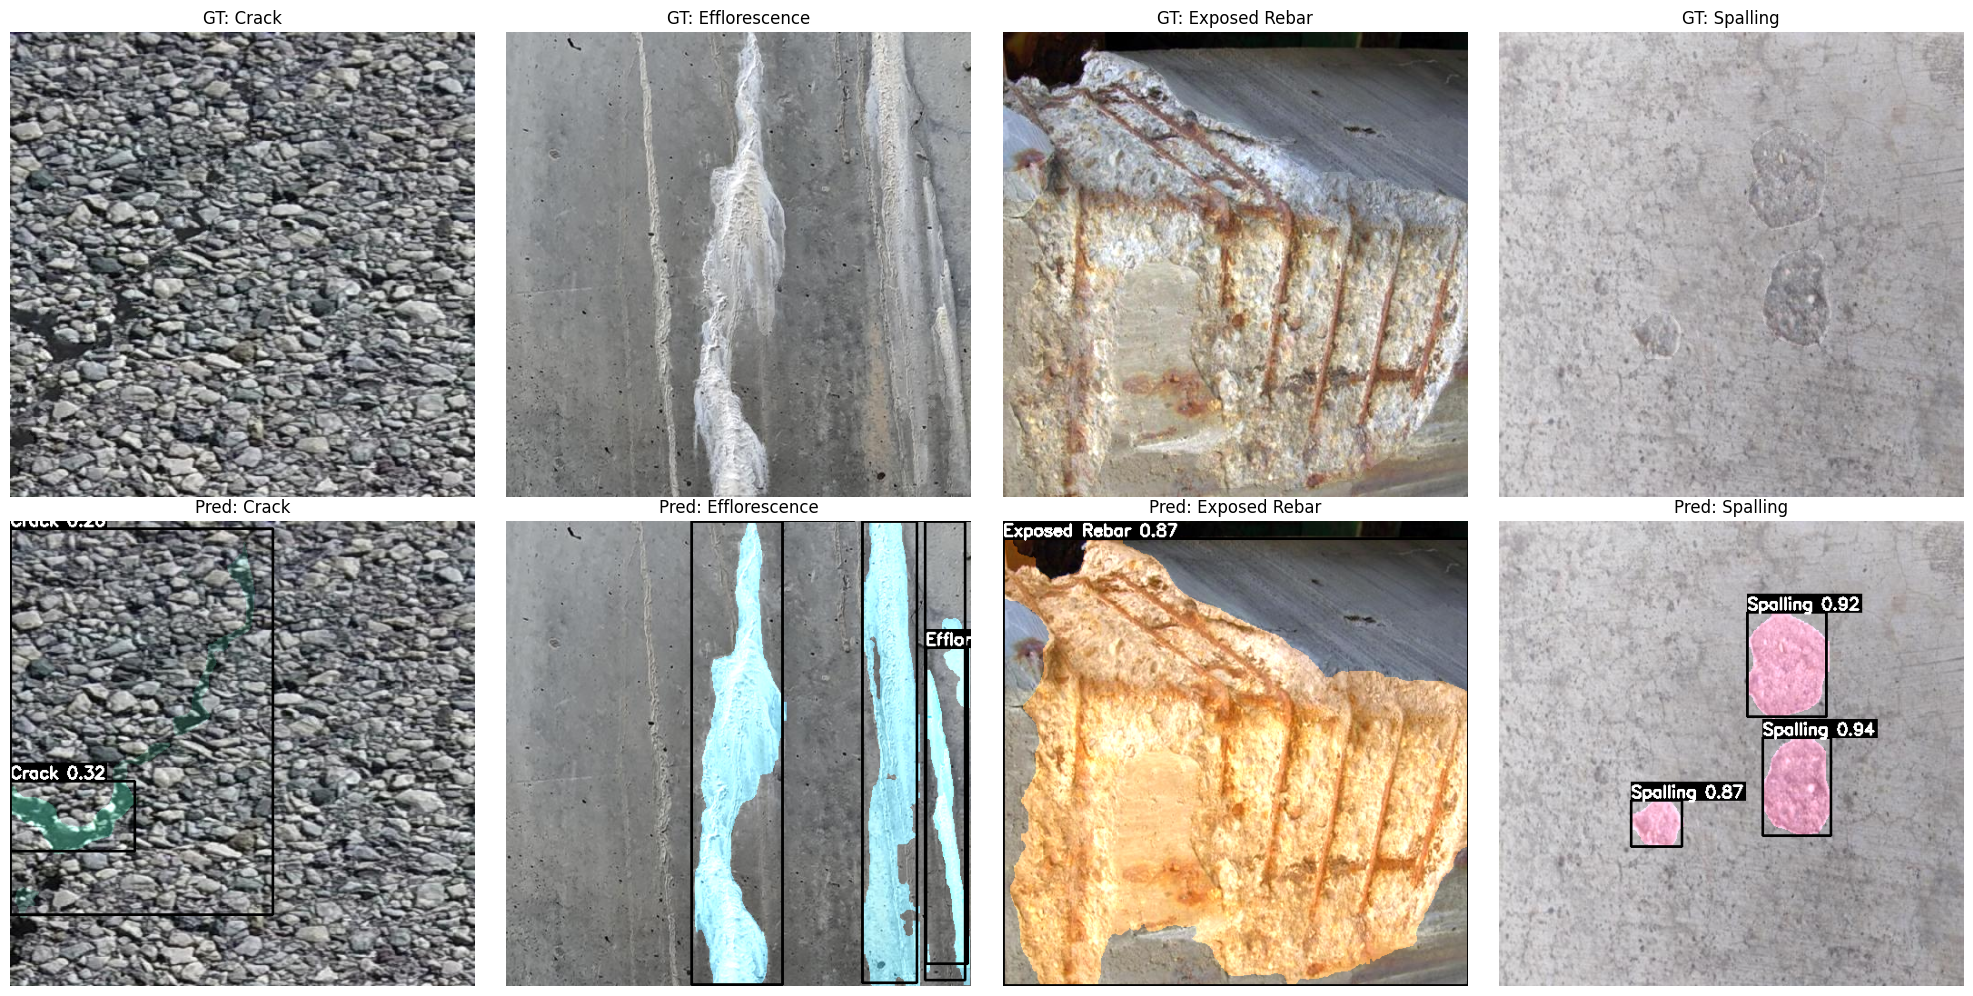

In [ ]:
# Iterate through the class_image_files dictionary and collect images for plotting
gt_images_to_plot = []
pred_images_to_plot = []
class_labels = []

for cls_id, img_file in class_image_files.items():
    if img_file:
        # Determine the corresponding YOLO label file path
        img_name = os.path.basename(img_file)
        txt_file = os.path.join(val_label_dir, img_name.replace(".jpg", ".txt").replace(".jpeg", ".txt").replace(".png", ".txt"))

        # Load original image
        img = load_image_or_npy(img_file)

        # ----------------- Ground Truth Overlay (Dark Gray) -----------------
        gt_mask = parse_yolo_segmentation_mask(txt_file, img.shape[:2])
        gt_overlay = img.copy()

        if gt_mask is None:
             print(f"Could not load ground truth mask for {img_file}. Displaying original image instead for GT.")
        else:
            dark_gray = (50, 50, 50) # Dark gray color in RGB
            colored_gt_mask = np.zeros_like(img, dtype=np.uint8)
            for mask_cls_id in np.unique(gt_mask):
                if mask_cls_id != 0:
                     colored_gt_mask[gt_mask == mask_cls_id] = dark_gray
            gt_overlay = cv2.addWeighted(img, 1, colored_gt_mask, 0.5, 0) # Using alpha = 0.5


        # ----------------- YOLOv8 Prediction Overlay (Black Boxes) -----------------
        pred_results = model(img_file)
        pred_overlay = img.copy()

        r = pred_results[0]
        if r.masks is not None:
            masks = r.masks.data.cpu().numpy()
            class_ids = r.boxes.cls.cpu().numpy().astype(int)
            confs = r.boxes.conf.cpu().numpy()
            class_names = model.names

            # Overlay predicted masks (using consistent class_colors)
            for i, mask in enumerate(masks):
                mask_resized = cv2.resize(mask, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_NEAREST)
                mask_binary = (mask_resized > 0.5).astype(np.uint8)

                if class_ids[i] not in class_colors:
                     class_colors[class_ids[i]] = [np.random.randint(0,255) for _ in range(3)]
                color = class_colors[class_ids[i]]

                colored_mask = np.zeros_like(img, dtype=np.uint8)
                for c in range(3):
                    colored_mask[:,:,c] = mask_binary * color[c]
                pred_overlay = cv2.addWeighted(pred_overlay, 1, colored_mask, 0.5, 0) # Using alpha = 0.5


            # Draw bounding boxes and labels (using black color for boxes)
            black_color = (0, 0, 0) # Black color for bounding boxes
            for i, box in enumerate(r.boxes.xyxy.cpu().numpy()):
                x1, y1, x2, y2 = map(int, box)
                cls_id_box = class_ids[i] # Use a different variable name to avoid conflict
                conf = confs[i]
                label = f"{class_names[cls_id_box]} {conf:.2f}"

                cv2.rectangle(pred_overlay, (x1, y1), (x2, y2), black_color, 2)
                (tw, th), baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.6, 2)
                cv2.rectangle(pred_overlay, (x1, y1 - th - baseline), (x1 + tw, y1), black_color, -1)
                cv2.putText(pred_overlay, label, (x1, y1 - 3), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255), 2) # White text on black background

        else:
          print(f"No predictions found for {img_file}")


        # Append the processed images and class label to lists
        gt_images_to_plot.append(gt_overlay)
        pred_images_to_plot.append(pred_overlay)
        class_labels.append(model.names[cls_id])


# ----------------- Plot in a 2x4 grid -----------------
if gt_images_to_plot and pred_images_to_plot:
    fig, axes = plt.subplots(2, num_classes, figsize=(20, 10)) # 2 rows, num_classes columns

    for i in range(num_classes):
        # Ground Truth row
        axes[0, i].imshow(gt_images_to_plot[i])
        axes[0, i].set_title(f"GT: {class_labels[i]}")
        axes[0, i].axis('off')

        # Predicted row
        axes[1, i].imshow(pred_images_to_plot[i])
        axes[1, i].set_title(f"Pred: {class_labels[i]}")
        axes[1, i].axis('off')

    plt.tight_layout()
    # Save the figure BEFORE showing it
    plt.savefig("segmentation_comparison_plot.png")
    print("\nPlot saved as 'segmentation_comparison_plot.png' in your Colab environment. You can download it from the file browser.")
    plt.show() # Now show the plot after saving

else:
    print("No images collected for plotting.")

## Summary:

### Data Analysis Key Findings

* The process successfully identified at least one image in the validation set for each of the four defined classes (Crack, Efflorescence, Exposed Rebar, and Spalling).
* For each selected image, side-by-side visualizations were generated, comparing the ground truth segmentation and bounding boxes with the model's predicted segmentation and bounding boxes.

### Insights or Next Steps

* The generated visualizations provide a qualitative assessment of the model's performance on individual class instances, which can be used to identify potential areas for improvement.
* A next step could be to quantitatively evaluate the model's performance using metrics such as Intersection over Union (IoU) for both bounding boxes and segmentation masks across the entire validation set.
